### Bài tập thực hành 1

Xây dựng mô hình từ giải thuật SVM trên dữ liệu bệnh tiểu đường. Dữ liệu lấy từ 
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp 

1.Import thư viện cần thiết

In [1]:
# BÀI TOÁN: DỰ ĐOÁN BỆNH TIỂU ĐƯỜNG BẰNG SVM
# Dataset: diabetes_prediction_dataset.csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

2. Đọc dữ liệu và xem vài dòng đầu

In [4]:
df = pd.read_csv("Dataset/diabetes_prediction_dataset.csv")
print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Thông tin kiểu dữ liệu, số lượng không null
print(df.info())
# Thống kê mô tả cho các cột số
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
#Kiểm tra phân bố nhãn và missing values
# Tỉ lệ lớp 0 / 1 trong cột diabetes
print("Giá trị unique trong cột 'diabetes':")
print(df["diabetes"].value_counts())
print("\nTỉ lệ phần trăm:")
print(df["diabetes"].value_counts(normalize=True) * 100)

# Kiểm tra xem có giá trị thiếu không
print("\nSố lượng giá trị thiếu trên từng cột:")
print(df.isna().sum())

Giá trị unique trong cột 'diabetes':
diabetes
0    91500
1     8500
Name: count, dtype: int64

Tỉ lệ phần trăm:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

Số lượng giá trị thiếu trên từng cột:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


3. EDA

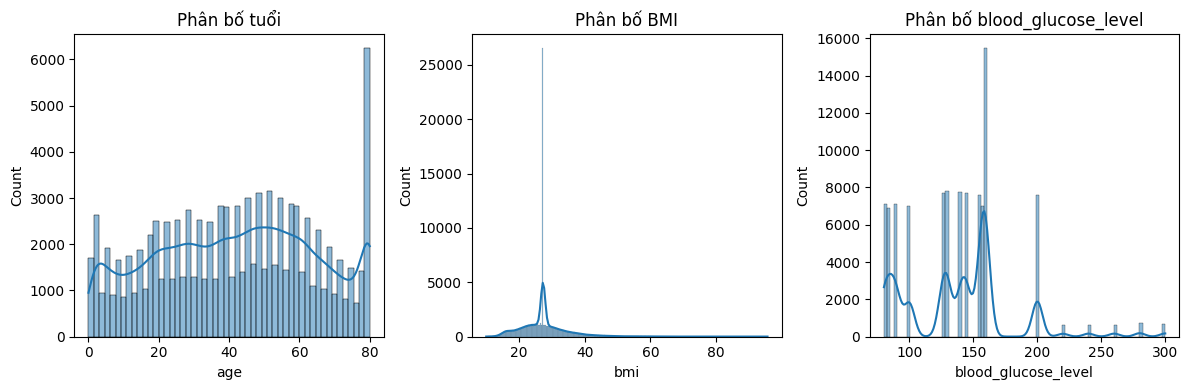

In [7]:
plt.figure(figsize=(12,4))

# Phân bố tuổi
plt.subplot(1,3,1)
sns.histplot(df["age"], kde=True)
plt.title("Phân bố tuổi")

# Phân bố BMI
plt.subplot(1,3,2)
sns.histplot(df["bmi"], kde=True)
plt.title("Phân bố BMI")

# Phân bố mức đường huyết
plt.subplot(1,3,3)
sns.histplot(df["blood_glucose_level"], kde=True)
plt.title("Phân bố blood_glucose_level")

plt.tight_layout()
plt.show()

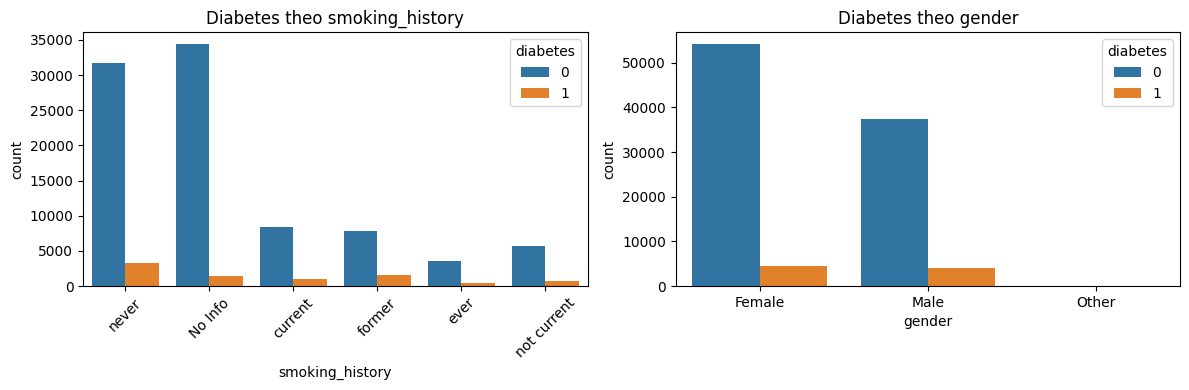

In [9]:
#Quan sát mối quan hệ giữa một vài đặc trưng và nhãn
plt.figure(figsize=(12,4))

# Tỉ lệ mắc bệnh theo tình trạng hút thuốc
plt.subplot(1,2,1)
sns.countplot(data=df, x="smoking_history", hue="diabetes")
plt.xticks(rotation=45)
plt.title("Diabetes theo smoking_history")

# Tỉ lệ mắc bệnh theo giới tính
plt.subplot(1,2,2)
sns.countplot(data=df, x="gender", hue="diabetes")
plt.title("Diabetes theo gender")

plt.tight_layout()
plt.show()

In [10]:
# Xử lý dữ liệu
# One-hot encoding cho các cột dạng object
df_encoded = pd.get_dummies(
    df,
    columns=["gender", "smoking_history"],
    drop_first=True   # bỏ bớt 1 category để tránh đa cộng tuyến
)

print("Kích thước sau khi mã hóa:", df_encoded.shape)
df_encoded.head()

Kích thước sau khi mã hóa: (100000, 14)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


4.Tách đặc trưng (X) và nhãn (y), rồi chia train/test

In [11]:
#Tách đặc trưng (X) và nhãn (y), rồi chia train/test
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Chia dữ liệu: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y    # giữ tỉ lệ lớp giống nhau trong train/test
)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test :", X_test.shape)

Kích thước X_train: (80000, 13)
Kích thước X_test : (20000, 13)


5.Chuẩn hóa dữ liệu (StandardScaler)

In [13]:

# SVM rất nhạy với độ lớn của feature, nên cần scaling.
scaler = StandardScaler()
# Fit scaler trên dữ liệu train, sau đó transform cả train và test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:5]  # xem thử 5 dòng đầu sau khi chuẩn hóa

array([[ 1.69106976e+00,  3.51600412e+00, -2.02791554e-01,
         4.72203802e-04,  9.08249004e-01,  1.70207008e-01,
        -8.41696245e-01, -1.41435500e-02, -3.20283341e-01,
        -2.03591989e-01,  3.10228464e+00, -7.35453197e-01,
        -2.63175621e-01],
       [-1.01645993e+00, -2.84413774e-01, -2.02791554e-01,
        -3.21771551e-01, -9.59680097e-01, -2.97057693e-01,
        -8.41696245e-01, -1.41435500e-02, -3.20283341e-01,
        -2.03591989e-01, -3.22343085e-01,  1.35970583e+00,
        -2.63175621e-01],
       [-2.61902476e-01, -2.84413774e-01, -2.02791554e-01,
        -2.05824032e-01,  1.00164546e+00,  1.52281535e+00,
        -8.41696245e-01, -1.41435500e-02, -3.20283341e-01,
        -2.03591989e-01, -3.22343085e-01, -7.35453197e-01,
        -2.63175621e-01],
       [-3.06288209e-01, -2.84413774e-01, -2.02791554e-01,
        -5.85288641e-01,  4.41266729e-01,  5.14507314e-01,
        -8.41696245e-01, -1.41435500e-02,  3.12223544e+00,
        -2.03591989e-01, -3.22343085e

6. Xây dựng & huấn luyện mô hình SVM (kernel RBF)

In [14]:
svm_clf = SVC(
    kernel="rbf",   # kernel RBF cho biên quyết định phi tuyến
    C=1.0,          # tham số phạt lỗi
    gamma="scale",  # gamma tự động theo sklearn
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)
print("Đã huấn luyện xong mô hình SVM.")

Đã huấn luyện xong mô hình SVM.


7.  Đánh giá mô hình trên train và test

In [15]:
# Dự đoán trên train và test
y_train_pred = svm_clf.predict(X_train_scaled)
y_test_pred  = svm_clf.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Độ chính xác trên tập huấn luyện:", round(train_acc, 4))
print("Độ chính xác trên tập kiểm tra   :", round(test_acc, 4))

print("\nBáo cáo chi tiết trên tập test:")
print(classification_report(y_test, y_test_pred))

Độ chính xác trên tập huấn luyện: 0.9638
Độ chính xác trên tập kiểm tra   : 0.9636

Báo cáo chi tiết trên tập test:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.97      0.59      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.96      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000



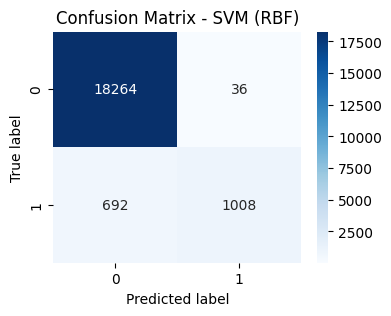

In [16]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - SVM (RBF)")
plt.show()

8. So sánh nhanh nhiều kernel khác nhau

In [17]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = []

for k in kernels:
    clf = SVC(kernel=k, C=1.0, gamma="scale", random_state=42)
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_test_scaled, y_test)
    results.append((k, acc))
    print(f"Kernel: {k:7s}  ->  Test accuracy: {acc:.4f}")

best_kernel, best_acc = max(results, key=lambda x: x[1])
print("\nBest validation accuracy :", best_acc, "with kernel:", best_kernel)

Kernel: linear   ->  Test accuracy: 0.9607
Kernel: poly     ->  Test accuracy: 0.9651
Kernel: rbf      ->  Test accuracy: 0.9636
Kernel: sigmoid  ->  Test accuracy: 0.9219

Best validation accuracy : 0.9651 with kernel: poly


9. Tuning sơ bộ tham số C, gamma cho kernel RBF

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C":     [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params :", grid.best_params_)
print("Best CV acc :", grid.best_score_)

best_model = grid.best_estimator_
best_test_acc = accuracy_score(y_test, best_model.predict(X_test_scaled))
print("Test accuracy với mô hình tốt nhất:", round(best_test_acc, 4))

Best params : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV acc : 0.9647500000000001
Test accuracy với mô hình tốt nhất: 0.9644
